In [238]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [239]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 1
Analyzing data and handling imbalanced dataset

In [240]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [241]:
print("Number of null values in dataset: {}".format(df.isnull().sum().max()))

Number of null values in dataset: 0


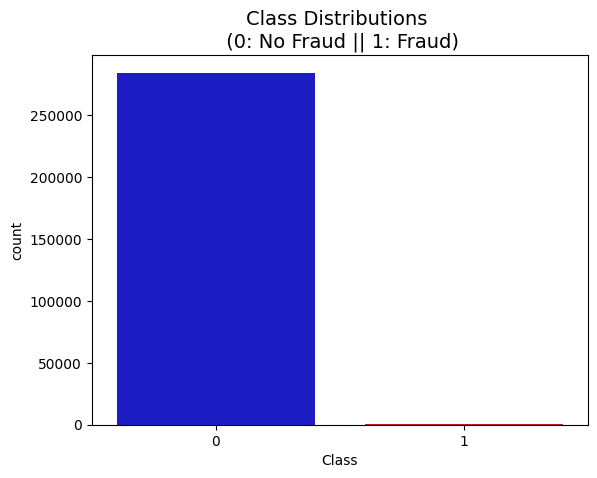

In [242]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

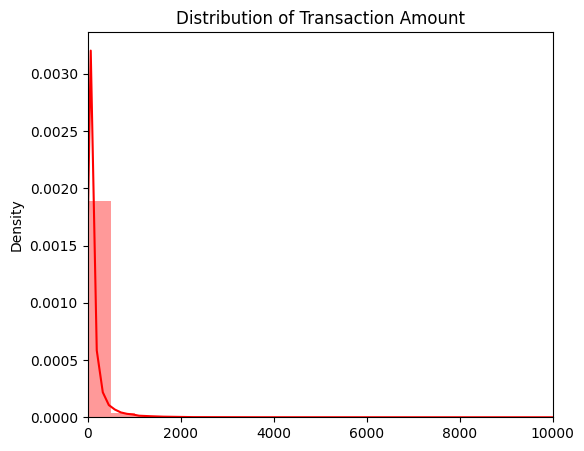

In [243]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
amount = df['Amount'].values

sns.distplot(amount, color='r')
ax.set_title('Distribution of Transaction Amount', fontsize=12)
ax.set_xlim([min(amount), 10000])

plt.show()

> Scaling 'Time' and 'Amount' columns

In [244]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
scaled_values = rob_scaler.fit_transform(df[['Amount', 'Time']])

df[['scaled_amount', 'scaled_time']] = scaled_values
df.drop(['Amount', 'Time'], axis=1, inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


# Step 2

Undersampling data and training a log_reg

First, create training and test set for performance measurement

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]

Xtrain = Xtrain.values
Xtest = Xtest.values
ytrain = ytrain.values
ytest = ytest.values


train_unique_label, train_counts_label = np.unique(ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(ytest, return_counts=True)

print('Label Distributions: \n')
print('Train Count Label Distribution (0, 1): ', train_counts_label/ len(ytrain))
print('Test Count Label Distribution (0, 1): ', test_counts_label/ len(ytest))

Label Distributions: 

Train Count Label Distribution (0, 1):  [0.99827076 0.00172924]
Test Count Label Distribution (0, 1):  [0.99827952 0.00172048]


Similar distribution of 0s and 1s, thanks to Stratified Shuffle Splitting of data!

Now, undersample the data (make number of 0s and 1s equal)

1) Random Undersampling


In [246]:
#shuffle
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

#first fraud rows, next non-fraud rows
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#shuffle again
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
222973,-1.085917,-0.158436,0.647181,-2.063602,-0.419871,-1.181310,-0.199768,0.387267,-0.851574,-0.262949,...,0.645093,-0.129188,-0.026147,0.007674,-0.252507,0.224754,0.061650,0,0.251520,0.687402
43681,-18.247513,8.713250,-17.880127,9.249459,-14.541213,-1.911564,-18.014660,5.522162,-9.283925,-14.557159,...,0.615319,-0.486499,0.739268,-0.236845,-0.046082,-3.011473,-1.022147,1,0.446447,-0.506174
175002,2.122109,0.620181,-2.788057,0.526579,1.106421,-1.198691,0.408819,-0.390841,0.457401,-1.221344,...,0.359671,-0.185704,-1.196059,0.423971,-0.040873,0.024024,-0.000969,0,-0.293440,0.440195
88897,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,-4.834828,...,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1,-0.292042,-0.262585
151011,-15.192064,10.432528,-19.629515,8.046075,-12.838167,-1.875859,-21.359738,-3.717850,-5.969782,-17.141514,...,1.765446,1.701257,0.381587,-1.413417,-1.023078,-2.634761,-0.463931,1,-0.293440,0.113629


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


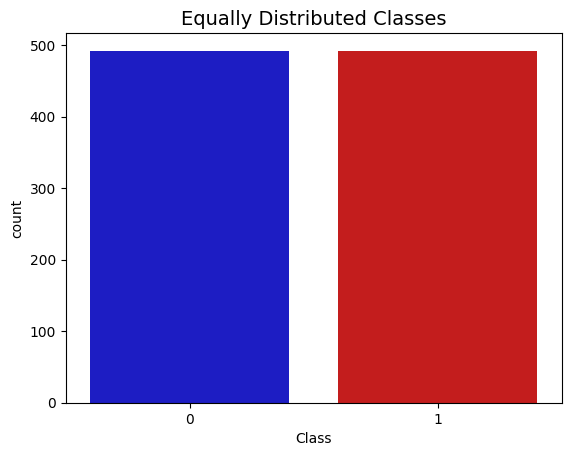

In [247]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

same number of 0s and 1s in the dataset (now, new_df)

correlation matrix of the undersampled data shows relationships between features, the skewed dataset (original) shows no particular relationship in its correlation matrix

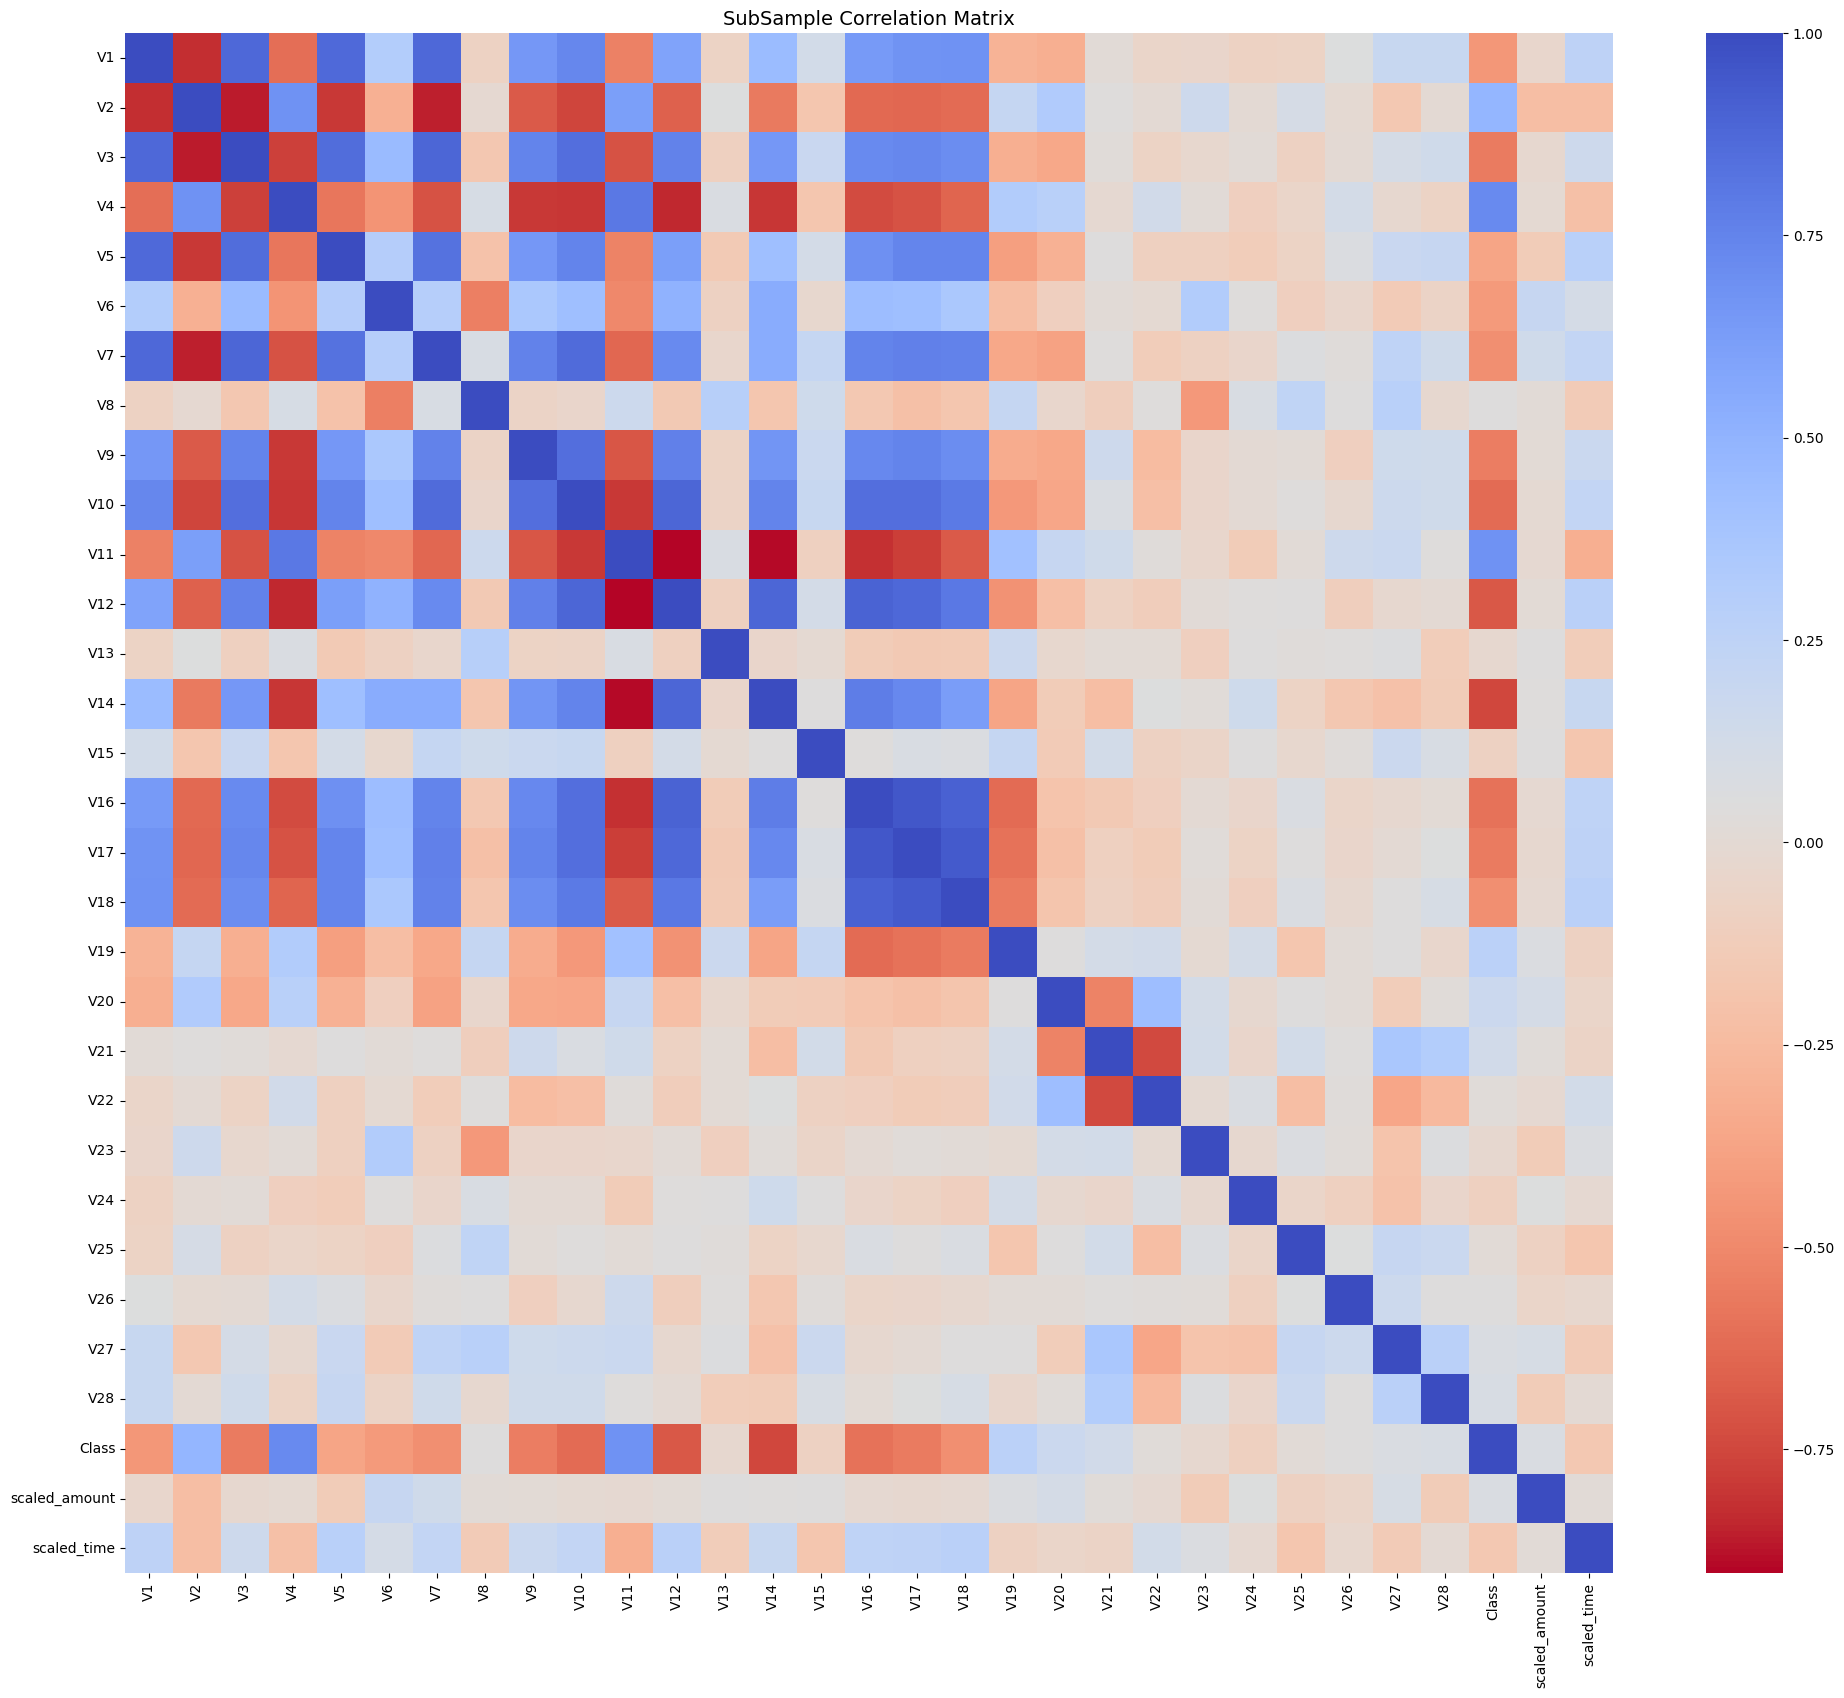

In [248]:
f, ax = plt.subplots(1, 1, figsize=(24,20))

corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

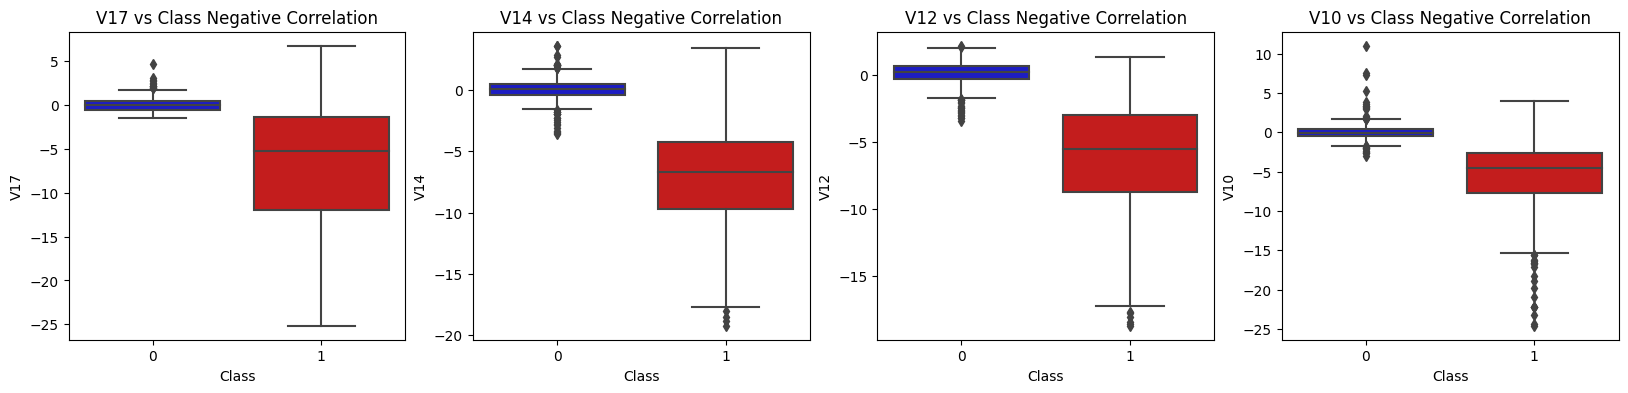

In [249]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

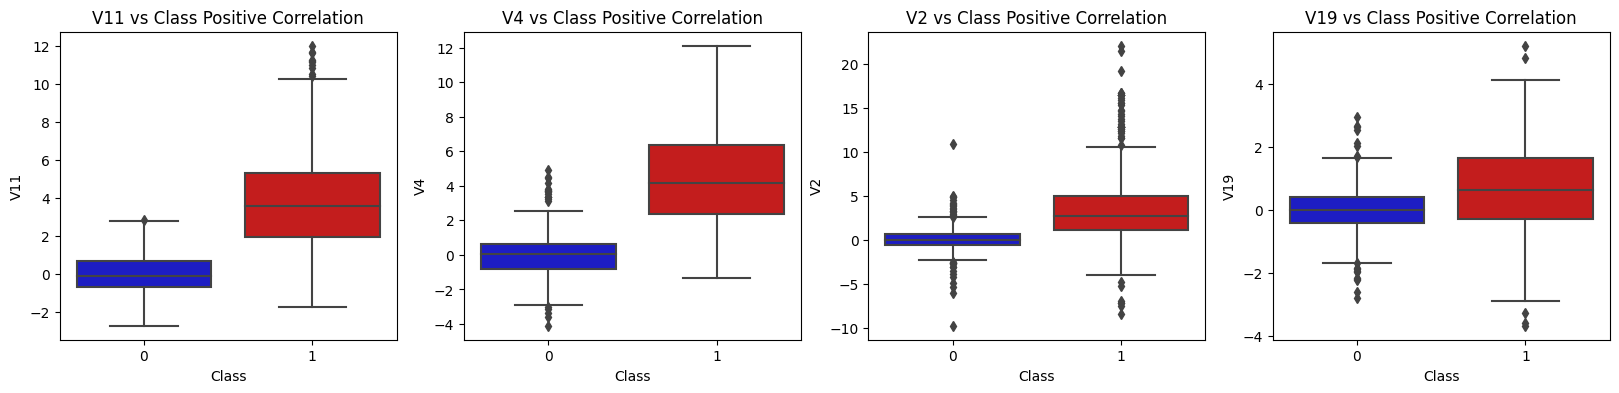

In [250]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

now, before fiting a log-reg on this undersampled data, let us remove extreme outliers in the dataset to hopefully increase precision of log-reg model

In [251]:
import numpy as np

def remove_outliers(df, feature_column, label_column='Class'):
    """
    Remove outliers for a given feature based on IQR (Interquartile Range).
    
    Parameters:
    - df: The dataframe containing the data.
    - feature_column: The column name for which to remove outliers.
    - label_column: The column representing the labels (default is 'Class').
    
    Returns:
    - df: The dataframe with outliers removed for the given feature.
    """
    
    feature_fraud = df[feature_column].loc[df[label_column] == 1].values
    
    q25, q75 = np.percentile(feature_fraud, 25), np.percentile(feature_fraud, 75)
    iqr = q75 - q25
    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    print(f'{feature_column} Lower: {lower}')
    print(f'{feature_column} Upper: {upper}')
    
    outliers = [x for x in feature_fraud if x < lower or x > upper]
    print(f'{feature_column} outliers: {outliers}')
    print(f'Feature {feature_column} Outliers for Fraud Cases: {len(outliers)}')
    
    df = df.drop(df[(df[feature_column] > upper) | (df[feature_column] < lower)].index)
    
    print(f'Number of Instances after outliers removal: {len(df)}')
    print('----' * 30)
    
    return df


# Removing outliers for V14
new_df = remove_outliers(new_df, 'V14')

# Removing outliers for V12
new_df = remove_outliers(new_df, 'V12')

# Removing outliers for V10
new_df = remove_outliers(new_df, 'V10')

V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
V14 outliers: [-18.0499976898594, -18.8220867423816, -18.4937733551053, -19.2143254902614]
Feature V14 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 980
------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.5536970096458, -18.6837146333443, -18.4311310279993, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-17.1415136412892, -16.7460441053944, -15.2399619587112, -24.4031849699728, -20.9491915543611, -16.6496281595399, -15.2318333653018, -15.1237521803455, -15.2399619587112, -16.2556117491401, -15.5637913387301,

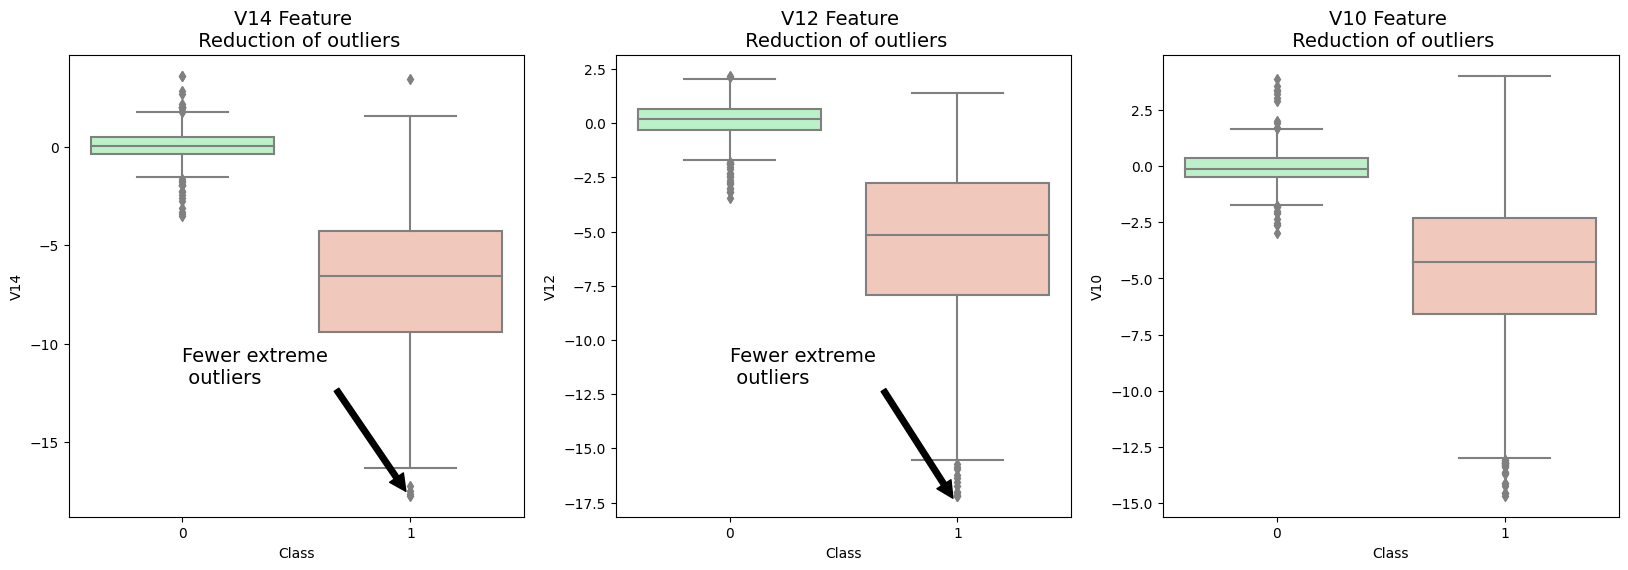

In [252]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

Fiting log-reg on the undersampled data

- dataset - new_df (undersampled data)
- model - log-reg

In [253]:
from sklearn.model_selection import train_test_split

# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [254]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Best possible cross-val score: ', round(log_reg_score.mean(), 2)*100, "% accuracy")

Best possible cross-val score:  94.0 % accuracy


# NearMiss technique for undersampling

first we use SSS to create training and test set and then we fit the undersampled data to Log Reg

Creating a pipeline with: 1) nearmiss 2) log reg fitting

In [255]:
X = df.drop('Class', axis=1)
y = df['Class']

for train_index, test_index in sss.split(X, y):
    undersample_Xtrain, undersample_Xtest = X.iloc[train_index], X.iloc[test_index]
    undersample_ytrain, undersample_ytest = y.iloc[train_index], y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

In [256]:
X_nearmiss, y_nearmiss = NearMiss(version=1).fit_resample(undersample_Xtrain, undersample_ytrain)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

NearMiss Label Distribution: Counter({0: 394, 1: 394})


Now, let's compare learning curves from random undersampling and nearmiss undersampling

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, X1, X2, y1, y2, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,14), sharey=True)  # Create side-by-side subplots
    if ylim is not None:
        plt.ylim(*ylim)

    # First Estimator
    train_sizes1, train_scores1, test_scores1 = learning_curve(estimator1, X1, y1, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean1 = np.mean(train_scores1, axis=1)
    train_scores_std1 = np.std(train_scores1, axis=1)
    test_scores_mean1 = np.mean(test_scores1, axis=1)
    test_scores_std1 = np.std(test_scores1, axis=1)

    ax1.fill_between(train_sizes1, train_scores_mean1 - train_scores_std1,
                     train_scores_mean1 + train_scores_std1, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes1, test_scores_mean1 - test_scores_std1,
                     test_scores_mean1 + test_scores_std1, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes1, train_scores_mean1, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes1, test_scores_mean1, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve (Original Data)", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator (with NearMiss)
    train_sizes2, train_scores2, test_scores2 = learning_curve(estimator2, X2, y2, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean2 = np.mean(train_scores2, axis=1)
    train_scores_std2 = np.std(train_scores2, axis=1)
    test_scores_mean2 = np.mean(test_scores2, axis=1)
    test_scores_std2 = np.std(test_scores2, axis=1)

    ax2.fill_between(train_sizes2, train_scores_mean2 - train_scores_std2,
                     train_scores_mean2 + train_scores_std2, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes2, test_scores_mean2 - test_scores_std2,
                     test_scores_mean2 + test_scores_std2, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes2, train_scores_mean2, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes2, test_scores_mean2, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Logistic Regression Learning Curve (With NearMiss)", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    plt.tight_layout()  # Adjust layout to prevent overlap
    return plt

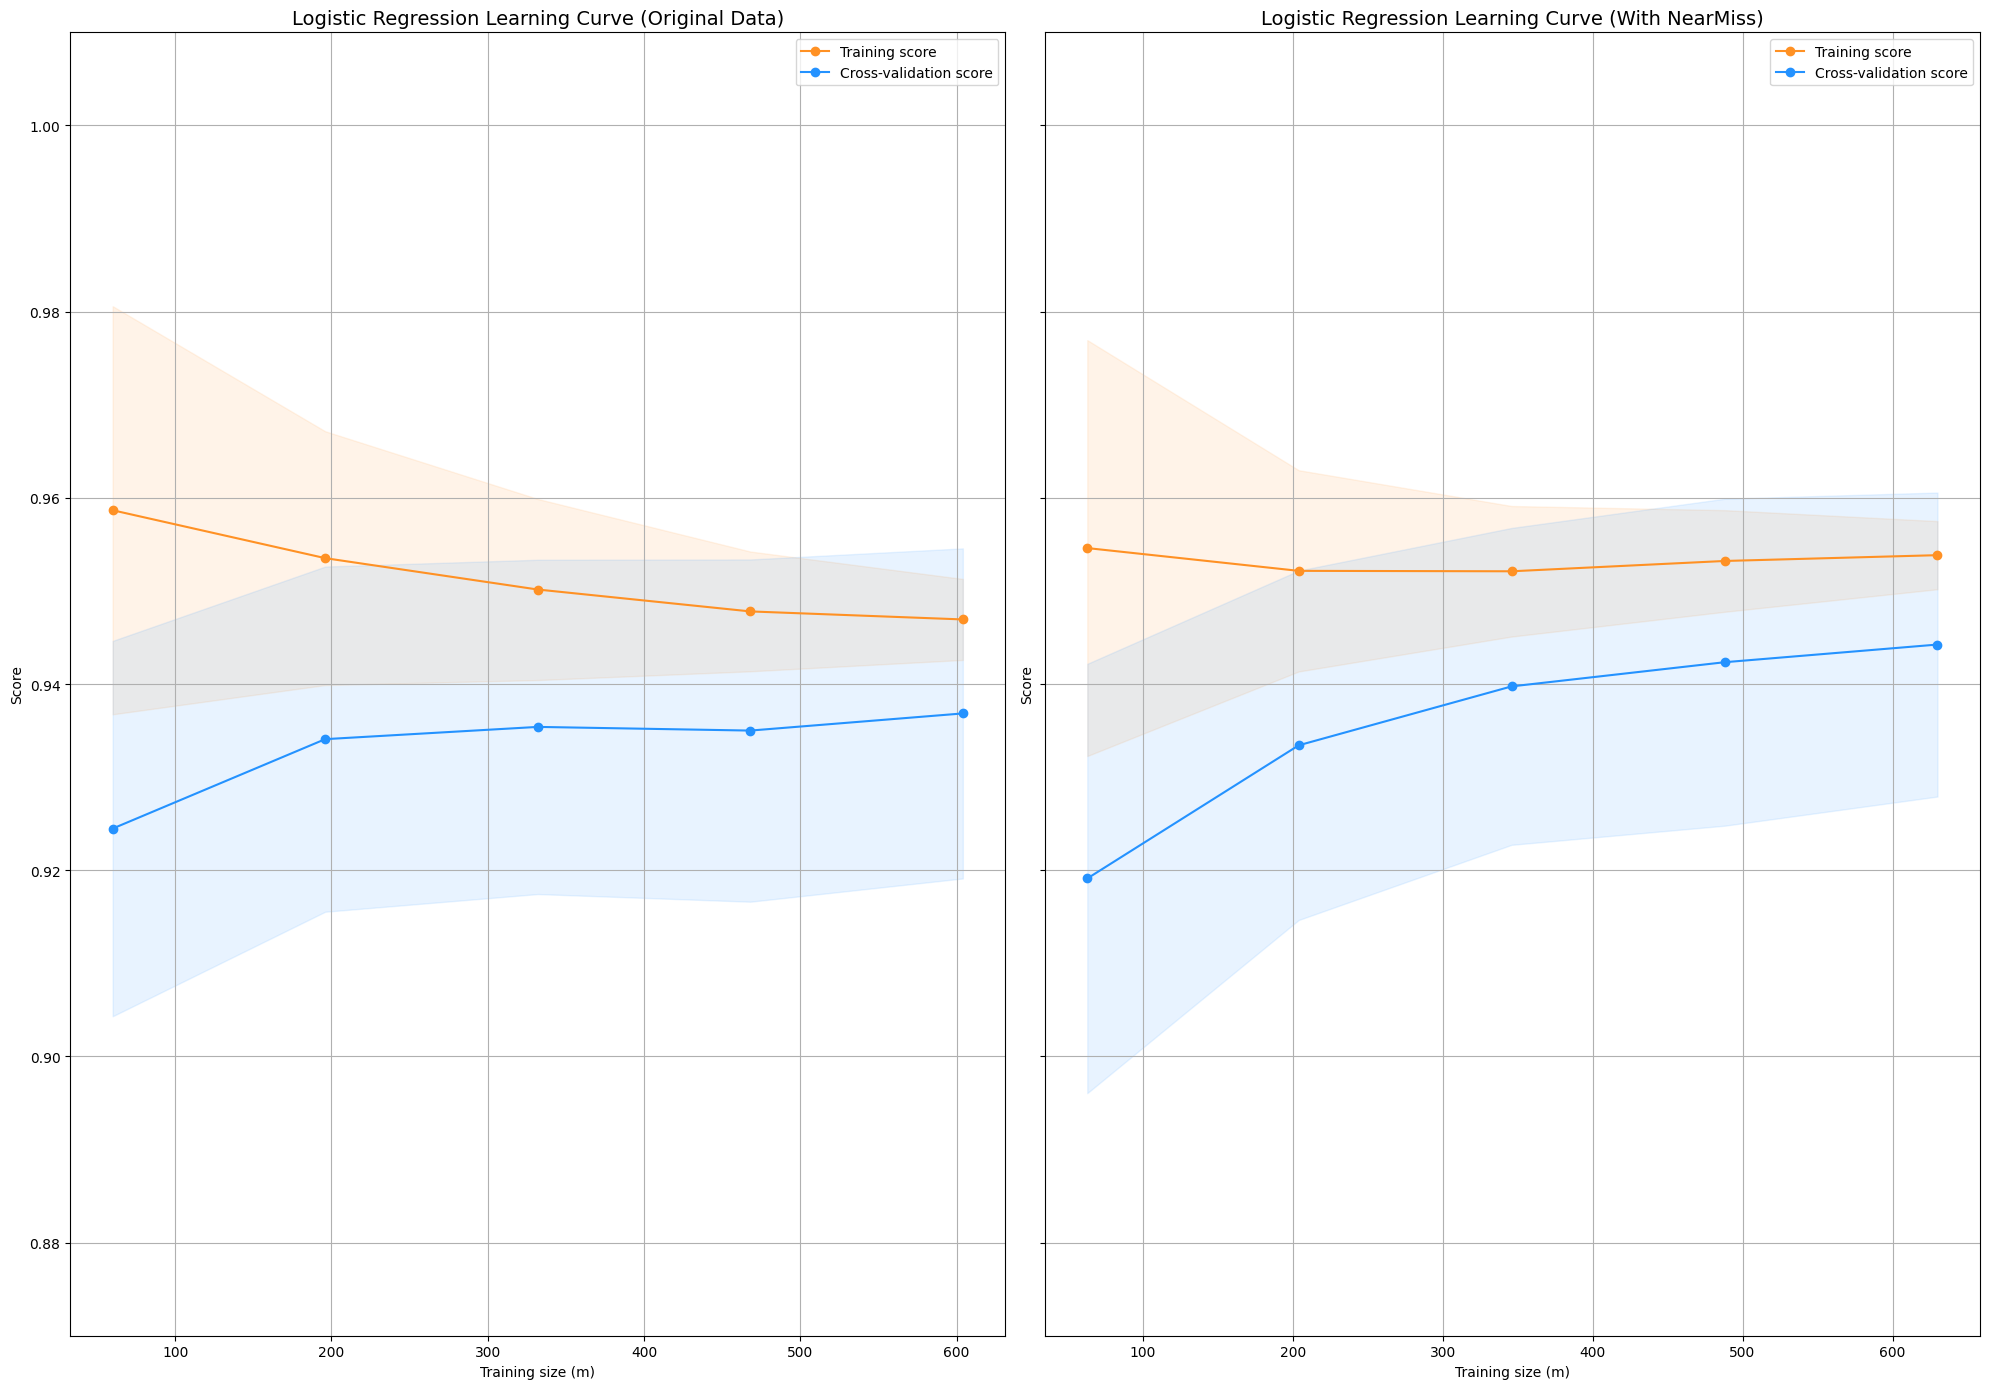

In [258]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)

plot_learning_curve(log_reg, log_reg, X_train, X_nearmiss, y_train, y_nearmiss, (0.87, 1.01), cv=cv, n_jobs=4)
plt.show()

Now, I have two log_reg. One fitted on random undersampled data, one on NearMiss data.

Accuracy:  0.9576719576719577
Precision:  1.0
Recall:  0.9120879120879121
F1 Score:  0.9540229885057472


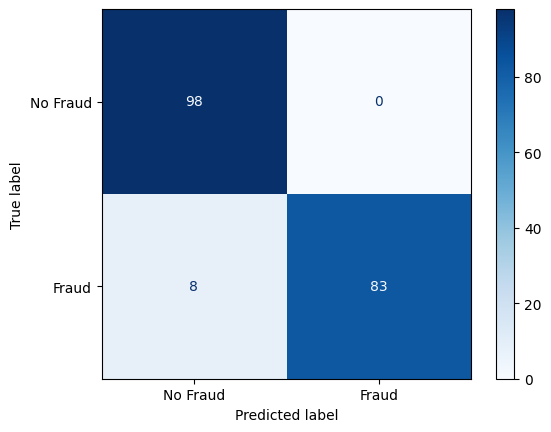

In [259]:
# Instantiate the model (Logistic Regression)
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
log_reg.fit(X_train, y_train)

y_pred_rand = log_reg.predict(X_test)

accuracy_rand = accuracy_score(y_test, y_pred_rand)
precision_rand = precision_score(y_test, y_pred_rand)
recall_rand = recall_score(y_test, y_pred_rand)
f1_rand = f1_score(y_test, y_pred_rand)

# Print the results
print("Accuracy: ", accuracy_rand)
print("Precision: ", precision_rand)
print("Recall: ", recall_rand)
print("F1 Score: ", f1_rand)

# Generate the confusion matrix
cm_rand = confusion_matrix(y_test, y_pred_rand)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_rand, display_labels=["No Fraud", "Fraud"])
cm_display.plot(cmap="Blues", values_format="d")
plt.show()

Accuracy:  0.8518518518518519
Precision:  0.8
Recall:  0.9230769230769231
F1 Score:  0.8571428571428571


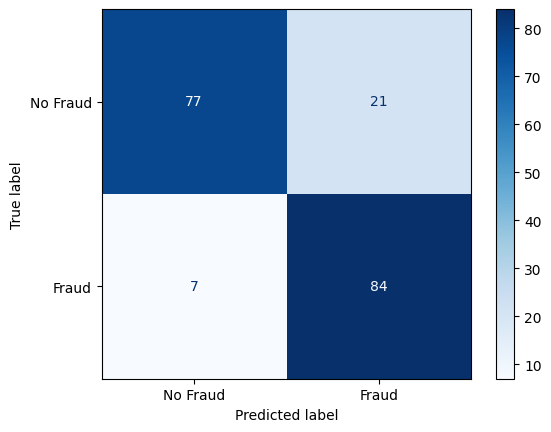

In [260]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
log_reg.fit(X_nearmiss, y_nearmiss)

y_pred_nm = log_reg.predict(X_test)

accuracy_nm = accuracy_score(y_test, y_pred_nm)
precision_nm = precision_score(y_test, y_pred_nm)
recall_nm = recall_score(y_test, y_pred_nm)
f1_nm = f1_score(y_test, y_pred_nm)

# Print the results
print("Accuracy: ", accuracy_nm)
print("Precision: ", precision_nm)
print("Recall: ", recall_nm)
print("F1 Score: ", f1_nm)

# Generate the confusion matrix
cm_nm = confusion_matrix(y_test, y_pred_nm)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_nm, display_labels=["No Fraud", "Fraud"])
cm_display.plot(cmap="Blues", values_format="d")
plt.show()

On multiple instances, randomly undersampled data fits better with log reg. With greater accuracy and recall

In [261]:
d = {'Technique': ['Random UnderSampling', 'NearMiss Undersampling'], 'Score': [accuracy_rand, accuracy_nm]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Technique,Score
0,Random UnderSampling,0.957672
1,NearMiss Undersampling,0.851852


# Step 3

## Oversampling

In [267]:
from sklearn.model_selection import train_test_split

# Undersampling before cross validating (prone to overfit)
X_os = df.drop('Class', axis=1)
y_os = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [268]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Set up your cross-validation strategy
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# Initialize lists to store metrics
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg = LogisticRegression()

log_reg_sm = GridSearchCV(log_reg, log_reg_params)

# Loop through cross-validation splits
for train, test in sss.split(X_train, y_train):
    # Create pipeline with SMOTE oversampling
    pipeline = make_pipeline(SMOTE(sampling_strategy='minority'), log_reg_sm)
    
    # Fit the model on training data (SMOTE will oversample here)
    model = pipeline.fit(X_train[train], y_train[train])
    
    # Get the best model after grid search
    log_reg_smbest = log_reg_sm.best_estimator_
    
    # Predict on the test data (no resampling applied to test data)
    prediction = log_reg_smbest.predict(X_train[test])
    
    # Store evaluation metrics
    accuracy_lst.append(accuracy_score(y_train[test], prediction))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))

# Print cross-validation results
print('Cross Val Results: ')
print('---' * 45)
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Cross Val Results: 
---------------------------------------------------------------------------------------------------------------------------------------
accuracy: 0.9755742165784007
precision: 0.06039579719280053
recall: 0.9182608695652175
f1: 0.11327256766220777
---------------------------------------------------------------------------------------------------------------------------------------


Test Results: 
---------------------------------------------------------------------------------------------------------------------------------------
Accuracy:  0.9780731013658228
Precision:  0.07212622088655146
Recall:  0.8727272727272727
F1 Score:  0.13324080499653018


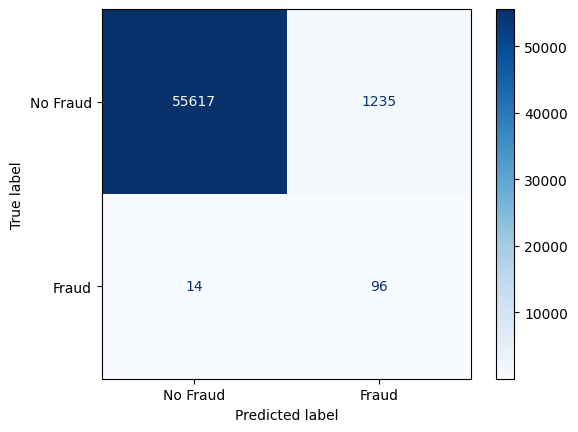

In [269]:
# Evaluate the model on the original test data
y_pred_os = log_reg_smbest.predict(X_test)

# Calculate and print test results
accuracy_os = accuracy_score(y_test, y_pred_os)
precision_os = precision_score(y_test, y_pred_os)
recall_os = recall_score(y_test, y_pred_os)
f1_os = f1_score(y_test, y_pred_os)

print('Test Results: ')
print('---' * 45)
print("Accuracy: ", accuracy_os)
print("Precision: ", precision_os)
print("Recall: ", recall_os)
print("F1 Score: ", f1_os)

# Confusion matrix for oversampled data
cm_oversample = confusion_matrix(y_test, y_pred_os)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm_oversample, display_labels=["No Fraud", "Fraud"])
cm_display.plot(cmap="Blues", values_format="d")
plt.show()


In [272]:
d = {'Technique': ['Random UnderSampling', 'NearMiss Undersampling', 'SMOTE Oversampling'], 'Accuracy': [accuracy_rand, accuracy_nm, accuracy_os], 'Recall': [recall_rand, recall_nm, recall_os]}
final_df = pd.DataFrame(data=d)
final_df[['Accuracy', 'Recall']] = final_df[['Accuracy', 'Recall']].round(5)

final_df

,Technique,Accuracy,Recall
0,Random UnderSampling,0.95767,0.91209
1,NearMiss Undersampling,0.85185,0.92308
2,SMOTE Oversampling,0.97807,0.87273
